In [102]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


/home/grigory/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['multiply']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Лабораторная работа № 1:
Реализовать смешивание (blending) двух изображений 8 bpp одинакового размера, используя в качестве альфа-канала третье изображение 8 bpp. 
Реализовать зеркальное отражение пикселов изображения относительно вертикальной оси, горизонтальной оси, а также транспонирование изображения.

In [68]:
import os

C_s = plt.imread(os.path.join('..', 'images', 'cat1.jpg'))
C_b = plt.imread(os.path.join('..', 'images', 'cat2.jpg'))

# crop to align sizes
width = min(C_s.shape[1], C_b.shape[1])
height = min(C_s.shape[0], C_b.shape[0])
C_s = C_s[:height, :width, :]/255
C_b = C_b[:height, :width, :]/255

/home/grigory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/grigory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/grigory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in minimum


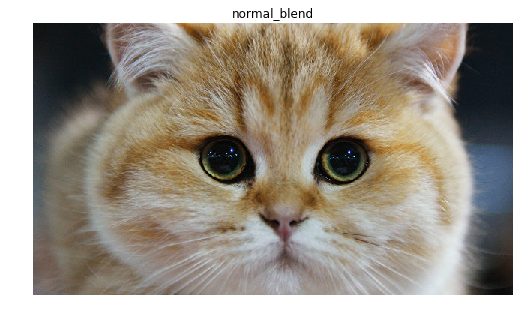

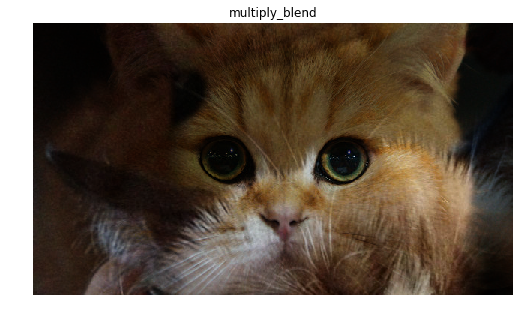

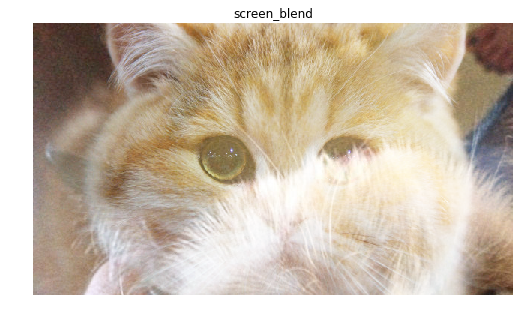

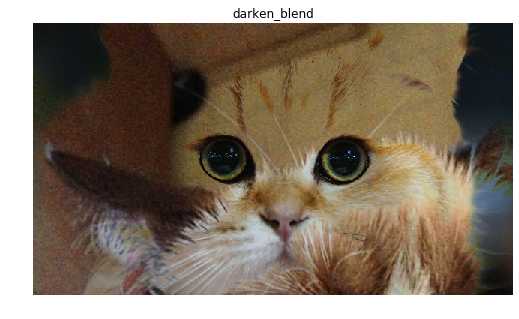

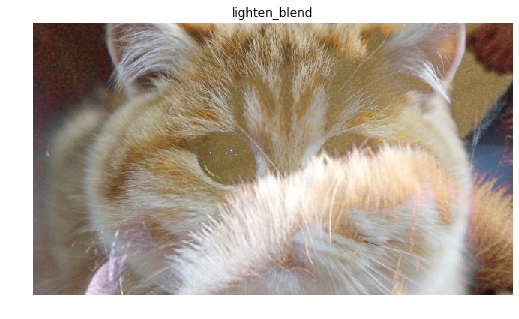

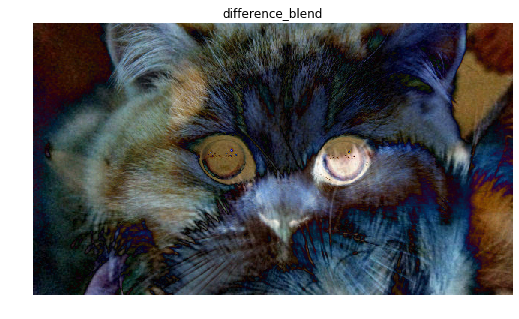

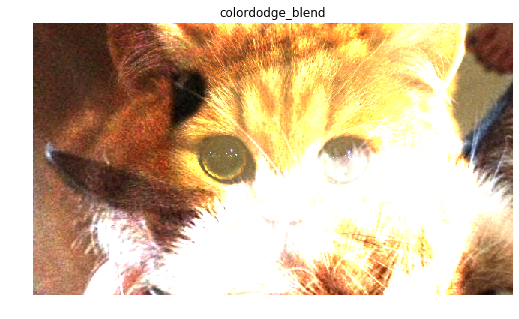

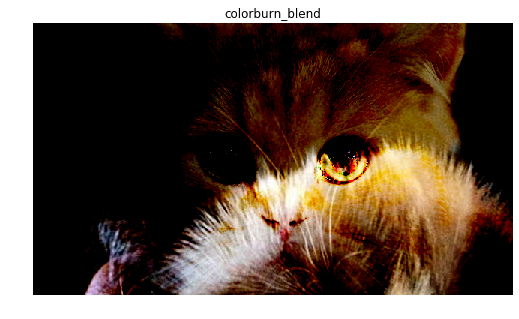

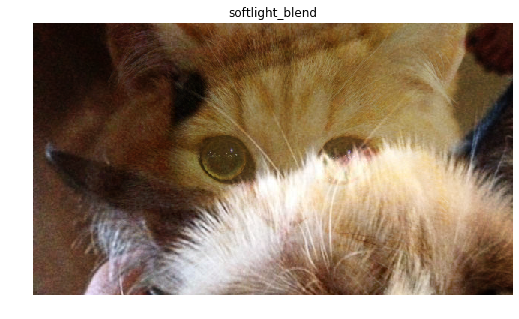

In [101]:
a_b = 1
a_s = 1

def normal_blend(C_b,C_s):
    return C_s
def multiply_blend(C_b, C_s):
    return C_b*C_s
def screen_blend(C_b, C_s):
    return 1 - (1 - C_b)*(1 - C_s)
def darken_blend(C_b, C_s):
    return np.minimum(C_b, C_s)
def lighten_blend(C_b, C_s):
    return np.maximum(C_b, C_s)
def difference_blend(C_b, C_s):
    return np.absolute(C_b - C_s)
def colordodge_blend(C_b, C_s):
    res = np.ones_like(C_b)
    mask = C_s<1
    res[mask] =  (np.minimum(1, C_b/(1-C_s)))[mask]
    return res
def colorburn_blend(C_b, C_s):
    res = np.zeros_like(C_b)
    mask = C_s>0
    res[mask] =  (1 - np.minimum(1, (1 - C_b)/C_s))[mask]
    return res
def softlight_blend(C_b, C_s):
    def D_x(x):
        res = ((16*x - 12)*x + 4)*x
        mask = x>0.25
        res[mask] =  np.sqrt(x)[mask]
        return res
    mask = C_s > 0.5
    res = C_b - (1-2*C_s)*C_b*(1-C_b)
    res[mask] = (C_b + (2*C_s - 1) * (D_x(C_b) - C_b))[mask]
    return res

def apply_blend(C_b, C_s, blend_method):
    return (1-a_s)*a_b*C_b + (1-a_b)*a_s*C_s + a_s*a_b*blend_method(C_b,C_s)

for blend in [normal_blend, multiply_blend,
             screen_blend, darken_blend, lighten_blend, difference_blend,
             colordodge_blend, colorburn_blend, softlight_blend]:
    C_r = apply_blend(C_b, C_s, blend)
    plt.figure(figsize=(10,5))
    plt.axis('off');
    plt.title(blend.__name__)
    plt.imshow(C_r);